In [2]:
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()   

True

In [3]:
from langchain.agents import create_agent
model=ChatGoogleGenerativeAI(model='gemini-2.5-flash',streaming=True)


def get_weather(city:str)->str:
    """ Get the weather of the city """
    return f"The weather in {city} is sunny"



agent=create_agent(
 model=model,tools=[get_weather],system_prompt="You are a helpful assistant"
)


Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


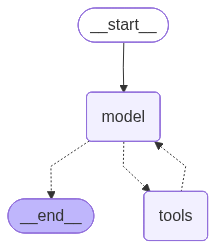

In [4]:
agent

In [5]:
agent.invoke({"messages": [{"role": "user", "content": "What is the weather like in New York?"}]})

{'messages': [HumanMessage(content='What is the weather like in New York?', additional_kwargs={}, response_metadata={}, id='1fc7e759-ecc2-4a5d-9a51-58761ec5e87c'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"city": "New York"}'}, '__gemini_function_call_thought_signatures__': {'e55b8ac2-7954-40ac-8d1d-93d2292a16ea': 'CiQBcsjafGjT04Igq7UdUIyhyQuM1sYnTIeeq8D+2qfYgOQfp38KXgFyyNp82G/SEfCAozU8yKQvWgC9mM6QG1eqhdn37eFbXBKILpI0H7HvNo0fxp/bGWnbVSE0a/scD+QAtBE+cArlbimM5kkJXdcrzTN2U41HTzapGrF7/fnBa+CHW4UK4wEBcsjafNKnG1uUqmUoXloxbj79DVNlZRpvDOoJxKl2auly+oGhkN8847QP9aXeDaLdWPfFtmXDqzYuT+4o9gI6ue6/YoKZzMdlEFNX9VnWgRhdk06ktGgBVsQst6K0VO48Viv5mRldtj5TdeBJPIJZiWEMTyn0kgqtXHxNO0l1SHoGxOK9Y4cJ0/fZI44MkA5lh6Qm2kQmA7bCePxTkFRDUx9/hY5Cn50yl59Nb6m/Nmllvdu34KnS3YYSeK20h3ci5BKuLtjd9WENgyDdiPWRuxNyRFxKtjsaVzehQr93phYV3w=='}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'

# Model integration with Gemini and Groq

In [7]:
import os 
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [106]:
from langchain_groq import ChatGroq

groqmodel=ChatGroq(model='llama-3.1-8b-instant',streaming=False)

In [58]:
from langchain.chat_models import init_chat_model

In [79]:
qwenmodel=init_chat_model(model="qwen/qwen3-32b",       # Use the correct Groq model ID
    model_provider="groq")

In [73]:
gemini_model=ChatGoogleGenerativeAI(model='gemini-2.5-flash',streaming=True)

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


# Streaming and Batch

# Streaming 

In [66]:
for chunks in model.stream("OK write me a poem on itachi uchiha"):
    print(chunks.text)


In
 Kon
oha
's
 shadow
,
 a
 legend
 born
,

It
achi
 U
chi
ha
,
 with
 eyes
 that
 mourn
.

A
 brother
's
 love
,
 a
 village
's
 strife
,

A
 tragic
 tale
,
 of
 life
 and
 r
ife
.


With
 Sharing
an
's
 power
,
 he
 could
 see
,

The
 destin
ies
 of
 those
 yet
 to
 be
.

A
 genius
,
 a
 warrior
,
 a
 soul
 so
 bright
,

A
 complex
 heart
,
 in
 the
 dark
 of
 night
.


He
 walked
 the
 line
,
 between
 right
 and
 wrong
,

Between
 loyalty
 and
 a
 life
 so
 long
.

A
 promise
 to
 Sas
uke
,
 a
 brother
's
 vow
,

To
 protect
,
 to
 guide
,
 through
 it
 all
 somehow
.


The
 massacre
 at
 the
 U
chi
ha
 clan
's
 door
,

A
 dark
 event
,
 forever
 in
 store
.

The
 weight
 of
 it
,
 the
 guilt
 and
 the
 pain
,

A
 burden
 he
 bore
,
 like
 a
 constant
 rain
.


It
achi
,
 the
 out
cast
,
 the
 one
 so
 alone
,

A
 hero
,
 a
 villain
,
 forever
 to
 at
one
.

His
 story
,
 a
 paradox
,
 of
 love
 and
 hate
,

A
 testament
 to
 the
 darkness
 that
 waits
.


His
 eyes
,
 a
 window


In [67]:
for chunks in model2.stream("OK write me a poem on itachi uchiha"):
    print(chunks.text,end="",flush=True)

<think>
Alright, the user wants a poem about Itachi Uchiha. Let me start by recalling who Itachi is. He's a major character from Naruto, known for his tragic backstory, immense power, and complex role in the story. I need to capture his essence—his strength, his sacrifice, and the internal conflict he faces.

First, I should think about the structure. Maybe a traditional poem with stanzas and rhyme. Rhyming couplets could work. I need to highlight key aspects: his Sharingan, the Uchiha clan, his role as a villain turned hero, and his ultimate redemption.

I should start with imagery related to his eyes, since the Sharingan is iconic. Words like "crimson eyes" or "obsidian gaze" come to mind. Then mention the Uchiha clan's legacy and his role in the massacre. Need to convey the tragedy of his actions—how he had to kill his own family for the greater good.

Including his relationship with Sasuke is important. The bond between brothers and Itachi's desire for Sasuke to surpass him. Maybe 

```markdown
# Batch Definitions

**Batch (Streaming)**  
A *batch* in streaming refers to a finite collection of data records that are grouped together and processed as a single unit within a continuous data‑flow pipeline. Instead of handling each event individually, the system accumulates records over a short window (time‑ or size‑based) and then applies transformations, aggregations, or writes them out in one operation.

**Batch (Chat Models)**  
In the context of chat‑based language models, a *batch* is a set of independent input prompts (or conversations) that are fed to the model simultaneously. The model processes all prompts in parallel, producing a corresponding set of responses in one forward pass, which improves throughput and makes efficient use of GPU/TPU resources.
```


In [14]:
response2=model3.batch(["Why is Itachi so hyped charcter rn","What is the best anime series ever?","Which character had been known as villian but later recognised as hero after his death"])

for response in response2:
    print(response)

content='**TL;DR:**\u202fItachi\u202fUchiha is “hyped” right now because his tragic, morally‑grey story, iconic design, and powerful abilities keep resonating with both old‑school fans and a new generation of viewers. Recent media pushes (games, merch, memes, and the *Boruto* sequel) have amplified his presence, turning him into a perpetual pop‑culture touchstone.\n\n---\n\n## 1. The core of the hype: *Why the character itself is magnetic*\n\n| Aspect | What fans love | Why it sticks |\n|--------|----------------|----------------|\n| **Tragic back‑story** | He massacres his own clan, lives as a rogue, then sacrifices everything for his brother and village. | Humans are drawn to sacrifice, redemption, and the “bad‑guy‑who‑was‑really‑good‑all‑along” archetype. |\n| **Moral ambiguity** | He’s a *villain* on the surface, but his motives are revealed to be altruistic. | Modern audiences crave nuance; Itachi embodies the “ends justify the means” dilemma. |\n| **Brotherly love** | The reveal 

# Tools

In [15]:
from langchain.tools import tool

@tool
def get_weather(location:str)->str:
    """Get the weather at location"""
    return f"The weather at {location} "

model_with_tools=model3.bind_tools([get_weather])    

In [100]:
print(response)

content='' additional_kwargs={'reasoning_content': 'User asks current weather. Use function get_weather.', 'tool_calls': [{'id': 'fc_35530b72-66fa-4470-81c0-5e182b8f05a6', 'function': {'arguments': '{"location":"New York"}', 'name': 'get_weather'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 128, 'total_tokens': 167, 'completion_time': 0.082736851, 'completion_tokens_details': {'reasoning_tokens': 11}, 'prompt_time': 0.005317858, 'prompt_tokens_details': None, 'queue_time': 0.262836971, 'total_time': 0.088054709}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_4a19b1544c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019b4bd5-1bf0-79d0-8f06-4ea713a1c158-0' tool_calls=[{'name': 'get_weather', 'args': {'location': 'New York'}, 'id': 'fc_35530b72-66fa-4470-81c0-5e182b8f05a6', 'type': 'tool_call'}] usage_metadata={'input_tokens': 128, 'output_tokens'

# tools excecution loops

In [13]:
from langchain.tools import tool

@tool
def get_weather(location:str)->str:
    """Get the weather at a location"""
    return f"It's sunny in {location}"


model_with_tools=model.bind_tools([get_weather])

In [14]:
response = model_with_tools.invoke("What's the weather like in Boston?")
print(response)
for tool_call in response.tool_calls:
    # View tool calls made by the model
    print(f"Tool: {tool_call['name']}")
    print(f"Args: {tool_call['args']}")

content='' additional_kwargs={'function_call': {'name': 'get_weather', 'arguments': '{"location": "Boston"}'}} response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': [], 'model_provider': 'google_genai'} id='lc_run--019b4f60-d092-7c30-acd1-0923a97be179-0' tool_calls=[{'name': 'get_weather', 'args': {'location': 'Boston'}, 'id': '994ab4a7-d27e-416f-b6f1-41fefb7d8faa', 'type': 'tool_call'}] usage_metadata={'input_tokens': 48, 'output_tokens': 15, 'total_tokens': 63, 'input_token_details': {'cache_read': 0}}
Tool: get_weather
Args: {'location': 'Boston'}


In [15]:
messages = [{"role": "user", "content": "What's the weather in Boston?"}]
ai_msg = model_with_tools.invoke(messages)
messages.append(ai_msg)

# Step 2: Execute tools and collect results
for tool_call in ai_msg.tool_calls:
    # Execute the tool with the generated arguments
    tool_result = get_weather.invoke(tool_call)
    messages.append(tool_result)

# Step 3: Pass results back to model for final response
final_response = model_with_tools.invoke(messages)
print(final_response.text)
# "The current weather in Boston is 72°F and sunny."

I can tell you that it\'s sunny in Boston.


In [16]:
messages = [{"role": "user", "content": "What's the weather in Boston?"}]
ai_msg = model_with_tools.invoke(messages)
messages.append(ai_msg)

# Step 2: Execute tools and collect results
for tool_call in ai_msg.tool_calls:
    # Execute the tool with the generated arguments
    tool_result = get_weather.invoke(tool_call)
    messages.append(tool_result)

# Step 3: Pass results back to model for final response
final_response = model_with_tools.invoke(messages)
print(final_response.text)
# "The current weather in Boston is 72°F and sunny."

The weather in Boston is sunny.


# Messages

In [75]:
answer=groqmodel.invoke("ok so generate me a code for the messages in the langchain for python markdown cell in deteail that i can ditecly paste it in the markdown cell")
print(answer.content)


Here's an example code for a simple LangChain model in a Python Markdown cell:

### Install Required Libraries

Before we begin, we need to install the required libraries. You can install them using pip:

```bash
pip install langchain
```

### Load LangChain Libraries

```python
import langchain
from langchain.chains import huggingface
from langchain.embeddings import huggingface as hf_embedding
from langchain import LLMChain
```

### Define the Model Pipeline

```python
# Define the model and prompt template
model_name = "deepset/bert-base-cased-squad2"
llm = langchain.llms.HFLLM(model_name, language="en")

# Define the chain with the LLM
prompt = "Please answer this question in detail: "
chain = LLMChain(llm, prompt=prompt)

# Define the embedding
embedding = hf_embedding.HuggingFaceEmbedding(model_name)

# Define a chain with the embedding
chain_with_embedding = LLMChain(llm, embedding=embedding, prompt=prompt)
```

### Define a Function to Ask the Model a Question

```python
def as

# Messages



---

## Understanding Langchain Messages in Python

Langchain's messaging system is fundamental for building conversational AI applications. It allows you to represent the back-and-forth between a user and an AI. The core components are:

*   **`HumanMessage`**: Represents a message from the human user.
*   **`AIMessage`**: Represents a message from the AI.
*   **`SystemMessage`**: Represents instructions or context given to the AI at the beginning of a conversation.

These messages are often stored in a `list` which forms the `chat_history` or the `messages` passed to a chat model.

---

### Code Example: Basic Message Creation and Usage

This section demonstrates how to create these message objects and use them to initiate a simple conversation.

```python
# Import necessary classes from langchain
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

# 1. Create a System Message (optional but good practice for context)
# This sets the persona or instructions for the AI.
system_message = SystemMessage(content="You are a helpful AI assistant that translates English to French.")

# 2. Create a Human Message
# This represents the user's input or question.
human_message_1 = HumanMessage(content="Hello, how are you?")

# 3. Create an AI Message
# This would typically be a response from the AI, but we can simulate it.
ai_message_1 = AIMessage(content="Bonjour, comment allez-vous?")

# 4. Create another Human Message
human_message_2 = HumanMessage(content="Translate 'I love programming' to French.")

# 5. Combine messages into a list (e.g., for chat history)
conversation_history = [
    system_message,
    human_message_1,
    ai_message_1,
    human_message_2
]

# You can then print them to see their structure
print("--- Conversation History ---")
for message in conversation_history:
    print(f"Type: {type(message).__name__}")
    print(f"Content: {message.content}")
    print("-" * 20)

# Example: Accessing individual message content
print(f"\nLast human message: {conversation_history[-1].content}")
```

**Explanation:**

*   We import the required message classes.
*   We instantiate `SystemMessage`, `HumanMessage`, and `AIMessage` with their respective `content`.
*   We group these messages into a list called `conversation_history`. This is a common pattern for maintaining the state of a conversation.
*   The print statements show how you can inspect the type and content of each message.

---

### Code Example: Passing Messages to a Chat Model

This example shows how you would typically pass these messages to a Langchain chat model to get a response. For this to run, you'll need to have a Langchain chat model set up (e.g., OpenAI, HuggingFace).

```python
# Import necessary classes
from langchain_core.messages import HumanMessage, SystemMessage
# You'll need to import your chat model provider, e.g.:
# from langchain_openai import ChatOpenAI

# --- Assume 'chat' is an initialized chat model instance ---
# Example placeholder (replace with your actual model initialization):
# chat = ChatOpenAI(model="gpt-3.5-turbo")
# -----------------------------------------------------------

# For demonstration purposes without a live model:
class MockChatModel:
    def __init__(self, name="MockChat"):
        self.name = name

    def invoke(self, messages, config=None):
        print(f"--- Mock Chat Model Invoked ---")
        print("Received messages:")
        for msg in messages:
            print(f"- {type(msg).__name__}: {msg.content[:50]}...") # Truncate for display
        print("-------------------------------")
        # Simulate a response
        return AIMessage(content="This is a simulated AI response based on your input.")

# Initialize the mock model
chat = MockChatModel()

# Define the system prompt
system_prompt = SystemMessage(content="You are a friendly bot that likes to chat.")

# Define the user's first message
user_message_1 = HumanMessage(content="Hi there!")

# Define the conversation history to pass to the model
# The model will use this to understand the context
conversation_for_model = [
    system_prompt,
    user_message_1
]

print("\n--- Sending Messages to Chat Model ---")
# Call the chat model with the messages
ai_response = chat.invoke(conversation_for_model)

# Print the AI's response
print(f"AI Response: {ai_response.content}")

# You can now add the AI's response to the conversation history
conversation_for_model.append(ai_response)

# Add another human message
user_message_2 = HumanMessage(content="What's the weather like today?")
conversation_for_model.append(user_message_2)

print("\n--- Sending Updated Messages to Chat Model ---")
# Call the chat model again with the extended history
ai_response_2 = chat.invoke(conversation_for_model)

print(f"AI Response 2: {ai_response_2.content}")
```

**Explanation:**

*   We define a `system_prompt` to guide the AI.
*   We create an initial `HumanMessage`.
*   We assemble these into `conversation_for_model` and pass it to the `chat.invoke()` method.
*   The `invoke` method returns an `AIMessage` containing the AI's reply.
*   We demonstrate how to append the AI's response and the next human message to the list to maintain conversational flow for subsequent turns.
*   A `MockChatModel` is included to allow you to see the structure of the code without needing to set up an actual API key and model. You would replace this with your actual Langchain chat model.

---

### Code Example: Adding Metadata to Messages

Messages can also carry extra information in their `additional_kwargs` dictionary, which can be useful for debugging or passing specific instructions to certain components.

```python
# Import necessary classes
from langchain_core.messages import HumanMessage, AIMessage

# Message with additional arguments
human_message_with_meta = HumanMessage(
    content="Tell me a joke about cats.",
    additional_kwargs={"user_id": "user123", "request_id": "abc-def"}
)

ai_message_with_meta = AIMessage(
    content="Why did the cat sit on the computer? Because it wanted to keep an eye on the mouse!",
    additional_kwargs={"model_used": "mock_model_v1", "tokens_generated": 25}
)

print("--- Message with Metadata ---")
print(f"Human Message Content: {human_message_with_meta.content}")
print(f"Human Message Metadata: {human_message_with_meta.additional_kwargs}")
print("-" * 20)
print(f"AI Message Content: {ai_message_with_meta.content}")
print(f"AI Message Metadata: {ai_message_with_meta.additional_kwargs}")
```

**Explanation:**

*   The `additional_kwargs` parameter in the message constructor accepts a dictionary.
*   This allows you to attach arbitrary key-value pairs to a message. This can be useful for logging, tracking, or passing specific context that isn't part of the main conversational content.

---

**How to Use This Code in a Markdown Cell:**

1.  **Open your Jupyter Notebook or similar environment.**
2.  **Create a new Markdown cell.**
3.  **Paste the entire code block above (including the Markdown headers and explanations) directly into the Markdown cell.**
4.  **To run the Python code:**
    *   You can create separate Python code cells below the Markdown cell.
    *   Copy and paste the Python code blocks (the parts starting with `from langchain...` or `print(...)`) into these new code cells.
    *   **Alternatively**, if your Markdown renderer supports it, you can sometimes embed executable code directly within a Markdown cell (though this is less common and depends on the renderer). For standard Jupyter/Colab, separate code cells are the norm.

This approach provides both explanations and runnable code directly within your notebook, making it easy for you and others to understand and experiment with Langchain messages.

# 🦜 LangChain Message Types: End-to-End Guide

In LangChain, "Messages" are the core units of communication between the user and the LLM. Each message type has a specific role in the conversation history.

Here is a breakdown of all main message types with code examples.

---

### 1. SystemMessage
**Role:** Sets the behavior, persona, or initial instructions for the AI. It is typically the first message sent in a sequence.
**Use Case:** Telling the AI "You are a helpful coding assistant" or "Answer only in JSON".

```python
from langchain_core.messages import SystemMessage

# Create a system message
sys_msg = SystemMessage(content="You are a sarcastic AI assistant that loves puns.")

print(sys_msg)
# Output: content='You are a sarcastic AI assistant that loves puns.'
```

---

### 2. HumanMessage
**Role:** Represents input from the user (you).
**Use Case:** The actual question or prompt sending to the model.

```python
from langchain_core.messages import HumanMessage

# Create a human message
human_msg = HumanMessage(content="Tell me a joke about Python.")

print(human_msg)
# Output: content='Tell me a joke about Python.'
```

---

### 3. AIMessage
**Role:** Represents the response back from the AI model.
**Use Case:** Storing the history of what the AI previously said or processing the model's output.

```python
from langchain_core.messages import AIMessage

# Create an AI message (simulating a response)
ai_msg = AIMessage(content="Why did the Python programmer need glasses? Because he couldn't C#!")

print(ai_msg)
# Output: content="Why did the Python programmer need glasses? Because he couldn't C#!"
```

---

### 4. ToolMessage (Modern)
**Role:** Represents the result of a tool execution.
**Use Case:** When an agent calls a tool (like a Google Search or Calculator), the output of that tool is passed back to the model as a `ToolMessage`.
**Note:** Critical for agents using OpenAI function calling or LangGraph.

```python
from langchain_core.messages import ToolMessage

# Simulate a tool output
tool_msg = ToolMessage(
    content="The current weather in New York is 72°F",
    tool_call_id="call_AbCd12345" # ID linking back to the AI's request to use the tool
)

print(tool_msg)
```

---

### 5. FunctionMessage (Legacy)
**Role:** Similar to `ToolMessage` but used in older OpenAI function calling implementations.
**Recommendation:** Use `ToolMessage` for newer projects.

```python
from langchain_core.messages import FunctionMessage

func_msg = FunctionMessage(
    content="{'result': 'success'}",
    name="get_weather"
)
```

---

### 6. ChatMessage (Generic)
**Role:** A customizable message type where you can manually specify the role.
**Use Case:** If you are using a model provider that supports roles other than system/user/ai (rare).

```python
from langchain_core.messages import ChatMessage

# Manually specifying a role
chat_msg = ChatMessage(
    role="observer", 
    content="I am watching the conversation."
)
```

---

### ⚡ Quick Summary for LangGraph/Chains
When building a standard chat history list for an LLM call, it usually looks like this:

```python
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

messages = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content="Hi! I'm learning LangChain."),
    AIMessage(content="That's great! It's a powerful framework. What do you need help with?"),
    HumanMessage(content="Explain message types.")
]

# Pass 'messages' to your LLM
# llm.invoke(messages)
```


In [80]:
# text prompts -> use for basic and straightforward tasks 
qwenmodel.invoke("What is langgraph")


AIMessage(content='<think>\nOkay, the user is asking what LangGraph is. Let me start by recalling what I know about LangGraph. I remember that LangGraph is a framework developed by LangChain for building stateful, multi-step applications with large language models (LLMs). It\'s part of the LangChain ecosystem, which includes tools for handling prompts, memory, and agents.\n\nFirst, I need to explain the basic concept. LangGraph is designed to manage the flow of data and control between different components in an application. It allows developers to create workflows where each step can be a node, and edges define the transitions between these nodes. This is similar to state machines but tailored for LLM applications.\n\nNext, I should highlight its key features. Statefulness is important here because it allows the application to maintain context across multiple interactions. This is crucial for tasks that require memory, like conversational agents. Then there\'s modularity, which means 

In [84]:
from langchain.messages import SystemMessage, HumanMessage, AIMessage

messages=[SystemMessage(content="You are a poetry expert."),
HumanMessage(content="Write a poem about AI"),
AIMessage(content="That's great! It's a powerful framework. What do you need help with?"),]

response=qwenmodel.invoke(messages)
print(response.content)

<think>
Okay, the user asked me to write a poem about AI. Let me start by thinking about the key themes related to AI. There's the creation angle, like how AI is built by humans. Then there's the duality of AI—its potential for both good and harm. Maybe touch on the ethical aspects too, like the responsibilities of creators.

I should also consider the emotional aspect. AI is often personified, so maybe use metaphors that give it a life of its own. Words like "pulse" or "veins" could work. I need to balance the technical side with more poetic imagery. Maybe start with the birth of AI, then move to its growth and implications.

Rhyme scheme? Maybe a consistent pattern, like ABAB or AABB. Let me try quatrains with alternating rhymes. That should keep it flowing smoothly. Also, think about the structure: verses and a chorus. Wait, the user didn't specify structure, but poems often have stanzas. Let me check the example response they provided earlier to match the style.

Oh, the example ha

In [85]:
system_msg = SystemMessage(content="You are a helpful assistant.")
messages = [system_msg,HumanMessage(content="How do i create a REST API?")]
response=qwenmodel.invoke(messages)
print(response.content)

<think>
Okay, the user is asking how to create a REST API. Let me start by recalling what a REST API is. REST stands for Representational State Transfer, which is an architectural style for designing networked applications. So, the user probably wants to know the steps involved in building one.

First, I need to outline the general steps. They might be using a specific programming language, but since they didn't specify, I should mention common ones like Python, Node.js, Java, etc. Maybe start with choosing a framework. For example, in Python, Flask or Django REST Framework; in Node.js, Express. That makes sense.

Next, defining the endpoints. They need to understand what resources they want to expose. Like users, products, etc. Each resource would have endpoints like /users, /products. They should know about HTTP methods: GET, POST, PUT, DELETE. Maybe explain each method's purpose briefly.

Designing the data structure is important. They might need to use JSON for data exchange. So, h

In [87]:
# Detail info to the LLM through system message

system_msg = SystemMessage("""
You are a senior Python developer with expertise in web frameworks.
Always provide code examples and explain your reasoning.
Be concise but thorough in your explanations.
""")
messages = [
    system_msg,
    HumanMessage("How do I create a REST API?")
]

response = qwenmodel.invoke(messages)
print(response.content)

<think>
Okay, the user wants to create a REST API. Let me think about the best way to explain this. Since I'm a senior Python developer, I should probably suggest using a web framework like Flask or Django. But since REST APIs are common, maybe FastAPI is a good choice too because it's modern and efficient.

First, I need to outline the steps. Let me start with choosing a framework. FastAPI is popular now for building APIs quickly with async support and automatic docs. I'll go with FastAPI as the example.

Next, setting up the project. They'll need to install FastAPI and an ASGI server like Uvicorn. So the command would be pip install fastapi uvicorn. Then creating the main file, maybe main.py.

Then, defining the endpoints. The basic CRUD operations. Let's start with a simple GET endpoint. Like a root endpoint that returns "Hello World". Then maybe a POST endpoint for creating an item, GET for reading, PUT for updating, and DELETE for removing.

I should show code examples for each en

In [88]:
from langchain.messages import AIMessage, SystemMessage, HumanMessage

# Create an AI message manually (e.g., for conversation history)
ai_msg = AIMessage("I'd be happy to help you with that question!")

# Add to conversation history
messages = [
    SystemMessage("You are a helpful assistant"),
    HumanMessage("Can you help me?"),
    ai_msg,  # Insert as if it came from the model
    HumanMessage("Great! What's 2+2?")
]

response = model.invoke(messages)
print(response.content)

The answer to 2+2 is 4. Is there anything else I can help you with?


In [90]:
from langchain.messages import AIMessage
from langchain.messages import ToolMessage

# After a model makes a tool call
# (Here, we demonstrate manually creating the messages for brevity)
ai_message = AIMessage(
    content=[],
    tool_calls=[{
        "name": "get_weather",
        "args": {"location": "San Francisco"},
        "id": "call_123"
    }]
)

# Execute tool and create result message
weather_result = "Sunny, 72°F"
tool_message = ToolMessage(
    content=weather_result,
    tool_call_id="call_123"  # Must match the call ID
)

# Continue conversation
messages = [
    HumanMessage("What's the weather in San Francisco?"),
    ai_message,  # Model's tool call
    tool_message,  # Tool execution result
]
response = qwenmodel.invoke(messages)  # Model processes the result
print(response)

content="<think>\nOkay, the user asked for the weather in San Francisco. I called the get_weather function with the location set to San Francisco. The response came back as sunny with 72°F. Now I need to present this information clearly.\n\nFirst, I'll confirm the location to make sure there's no confusion. Then, state the current conditions: sunny and the temperature. I should keep it straightforward and friendly. Maybe add a suggestion about dressing appropriately for the weather. Let me check if there's any additional info needed, but since the user just asked for the weather, sticking to the basics should be fine. Avoid any technical jargon. Make sure the temperature is in the correct unit (Fahrenheit here). Alright, that should cover it.\n</think>\n\nThe current weather in San Francisco is **sunny** with a temperature of **72°F**. A light jacket might be comfortable if you're heading out! ☀️" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 190, 'prompt

# Structured Output 
# Assuming you have your model initialized (e.g., gemini_model or groqmodel)
# structured_llm = groqmodel.with_structured_output(MovieReview)
structured_llm = gemini_model.with_structured_output(MovieReview)

# Invoke the model with a natural language query
response = structured_llm.invoke("Review the movie Inception. It was amazing, released in 2010, gave it a 9.5/10. Loved the dream concept.")

# The 'response' is now a MovieReview OBJECT, not a string!
print(f"Movie: {response.title}")
print(f"Year: {response.year}")
print(f"Rating: {response.rating}")
print(f"Recommended: {response.is_recommended}")
print(type(response))

# Pydantic


In [95]:
from pydantic import BaseModel,Field

class Movie(BaseModel):
    title:str=Field(description="The title of the movie")
    year:int=Field(description="This year the movie was released")
    director:str=Field(description="The director of the movie")
    rating:float=Field(description="The movies rating out of 10")
    summary:str=Field(description="A summary of the movie")

In [98]:
model_with_structure=model.with_structured_output(Movie)
model_with_structure

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x00000224C8861950>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000224C87E53D0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'), streaming=True), kwargs={'tools': [{'type': 'function', 'function': {'name': 'Movie', 'description': '', 'parameters': {'properties': {'title': {'description': 'The title of the movie', 'type': 'string'}, 'year': {'description': 'This year the movie was released', 'type': 'integer'}, 'director': {'description': 'The director of the movie', 'type': 'string'}, 'rating': {'description': 'The movies rating out of 10', 'type': 'number'}, 'summary':

In [93]:
model.invoke("Provide details about the movie URI")

AIMessage(content="URI: The Surgical Strike is a 2019 Indian action thriller film directed by Aditya Dhar, produced by Ronnie Screwvala, and written by Aditya Dhar. The film stars Vicky Kaushal, Paresh Rawal, Yami Gautam, Kirti Kulhari, Mohit Raina, and Raj B Shetty in key roles.\n\n**Plot**\n\nThe film is based on a fictional story inspired by the 2016 Uri Army Base attack, which was a terrorist attack by Pakistan-based militants on the Indian Army's Uri Army Base in Jammu and Kashmir. The movie follows Major Karan Narayan Singh (Vicky Kaushal), a young and skilled Indian Army officer working in the Intelligence Wing. Singh leads a team of commandos, including Vihaan Singh Shergill (Paresh Rawal), a seasoned army officer, and his team, to carry out a covert operation against the terrorist camps in Pakistan-occupied Kashmir (PoK).\n\n**Cast**\n\n- Vicky Kaushal as Major Karan Narayan Singh\n- Paresh Rawal as Vihaan Singh Shergill\n- Yami Gautam as Tehmina\n- Kirti Kulhari as Pallavi\n-

In [100]:
response=model_with_structure.invoke("Provide details about the movie URI")
response

Movie(title='Uri', year=2019, director='Aditya Dhar', rating=7.5, summary='The film is based on the 2016 surgical strike conducted by the Indian Army in response to the Uri Attack in which 19 Indian soldiers were killed by militants')

# TypedDict
 #### TypedDict provides a simpler alternative using Python’s built-in typing, ideal when you don’t need runtime validation.

In [101]:
from typing_extensions import TypedDict,Annotated

class MovieDict(TypedDict):
    """A movie with details."""
    title: Annotated[str, ..., "The title of the movie"]
    year: Annotated[int, ..., "The year the movie was released"]
    director: Annotated[str, ..., "The director of the movie"]
    rating: Annotated[float, ..., "The movie's rating out of 10"]

model_withtypedict=model.with_structured_output(MovieDict)

In [102]:
response=model_with_structure.invoke("Provide details about the movie URI")

In [103]:
print(response)

title='Uri' year=2019 director='Aditya Dhar' rating=8.1 summary='The film is based on the 2016 Indian surgical strike led by then Indian Army Chief Dalbir S Suhag. The movie follows the story of a Indian Army Major, who leads a covert operation to avenge the killing of his fellow commandos by Pakistani terrorists in the Uri attack.'


In [109]:
class Actor(TypedDict):
    name: str
    role: str

class MovieDetails(TypedDict):
    title: str
    year: int
    cast: list[Actor]
    genres: list[str]
    budget: float | None = Field(None, description="Budget in millions USD")

model_with_structure = gemini_model.with_structured_output(MovieDetails)

response = model_with_structure.invoke("Provide details about the movie Avengers")
response

{'title': 'The Avengers',
 'year': 2012,
 'cast': [{'name': 'Robert Downey Jr.', 'role': 'Tony Stark / Iron Man'},
  {'name': 'Chris Evans', 'role': 'Steve Rogers / Captain America'},
  {'name': 'Mark Ruffalo', 'role': 'Bruce Banner / Hulk'},
  {'name': 'Chris Hemsworth', 'role': 'Thor'},
  {'name': 'Scarlett Johansson', 'role': 'Natasha Romanoff / Black Widow'},
  {'name': 'Jeremy Renner', 'role': 'Clint Barton / Hawkeye'},
  {'name': 'Tom Hiddleston', 'role': 'Loki'}],
 'genres': ['Action', 'Sci-Fi', 'Superhero'],
 'budget': 220000000}

# Middleware 

### Middleware provides a way to more tightly control what happens inside the agent. Middleware is useful for the following:

### 1.Tracking agent behavior with logging, analytics, and debugging.
### 2.Transforming prompts, tool selection, and output formatting.
### 3.Adding retries, fallbacks, and early termination logic.
###  .Applying rate limits, guardrails, and PII detection

In [115]:
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver # Assuming this is what you meant by InMemorySaver
# Note: If InMemorySaver is from a different package, keep your original import.

# 1. Initialize your Groq Model first
groq_model = ChatGroq(model="llama-3.1-8b-instant", temperature=0)

# 2. Use the Groq model inside the Agent and Middleware
agent = create_agent(
    model=groq_model,  # <--- Use Groq here
    checkpointer=InMemorySaver(),
    middleware=[
        SummarizationMiddleware(
            model=groq_model,       # <--- AND Use Groq here (Replaces "gpt-4o-mini")
            trigger=("messages", 10),
            keep=("messages", 4)
        )
    ]
)

In [117]:
### Run with thread id
config={"configurable":{"thread_id":"test-1"}}

In [118]:
questions = [
    "What is 2+2?",
    "What is 10*5?",
    "What is 100/4?",
    "What is 15-7?",
    "What is 3*3?",
    "What is 4*4?",
]

for q in questions:
    response=agent.invoke({"messages":[HumanMessage(content=q)]},config)
    print(f"Messages: {response}")
    print(f"Messages: {len(response['messages'])}")

Messages: {'messages': [HumanMessage(content='What is 2+2?', additional_kwargs={}, response_metadata={}, id='4c310ff5-2e6c-474f-ab7c-e106e2763aea'), AIMessage(content='2 + 2 = 4.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 42, 'total_tokens': 51, 'completion_time': 0.006615285, 'completion_tokens_details': None, 'prompt_time': 0.002808714, 'prompt_tokens_details': None, 'queue_time': 0.051185386, 'total_time': 0.009423999}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b55dd-98cb-77e1-8eea-15438623324d-0', usage_metadata={'input_tokens': 42, 'output_tokens': 9, 'total_tokens': 51})]}
Messages: 2
Messages: {'messages': [HumanMessage(content='What is 2+2?', additional_kwargs={}, response_metadata={}, id='4c310ff5-2e6c-474f-ab7c-e106e2763aea'), AIMessage(content='2 + 2 = 4.', additional_kwar